# Mobile Price Classification

## Objectives
Help Bob find out the relationship between features of a mobile phone and its price range. Additionally, build a model to help him predict the price range when values of features are given.

Therefore:
- Dependent variable: y = phone price range
- Independent variables: x = 
    - id: ID
    - battery_power: Total energy a battery can store in one time measured in mAh
    - blue: Has bluetooth or not
    - clock_speed: speed at which microprocessor executes instructions
    - dual_sim: Has dual sim support or not
    - fc: Front Camera mega pixels
    - four_g: Has 4G or not
    - int_memory: Internal Memory in Gigabytes
    - m_dep: Mobile Depth in cm
    - mobile_wt: Weight of mobile phone
    - n_cores: Number of cores of processor
    - pc: Primary Camera mega pixels
    - px_height: Pixel Resolution Height
    - px_width: Pixel Resolution Width
    - ram: Random Access Memory in Megabytes
    - sc_h: Screen Height of mobile in cm
    - sc_w: Screen Width of mobile in cm
    - talk_time: longest time that a single battery charge will last when you are
    - three_g: Has 3G or not
    - touch_screen: Has touch screen or not
    - wifi: Has wifi or not

## Steps
1. Data Preprocessing
2. Data Exploration
    - General view of the phone market
    - Relationship between phone attributes and price
    - Attributes of high-priced vs. low-priced phones
3. Build deep learning model to predict price range

## 1. Data Preprocessing 

### Load data 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#load data
test = pd.read_csv("C:/Ninh/Programming/Python/Machine Learning/Mobile Price Classification/test.csv")
train = pd.read_csv("C:/Ninh/Programming/Python/Machine Learning/Mobile Price Classification/train.csv")

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


### Check for null values 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

This dataset is clean with no null values.

## 2. Data Exploration

#### 2.1. General view of phone market

In [7]:
numerical = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt', 'n_cores', 'pc', 'px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
categorical = ['blue','dual_sim','four_g','three_g', 'touch_screen','wifi']

In [8]:
print(len(numerical))
print(len(categorical))

14
6


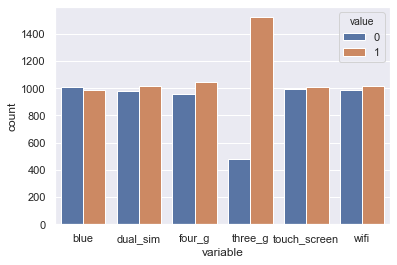

In [9]:
#categorical attributes
df = pd.melt(train[categorical])
sns.countplot(data=df,x='variable', hue='value')

Two-third of the phone market has 3g, while other attributes share similiar distribution.

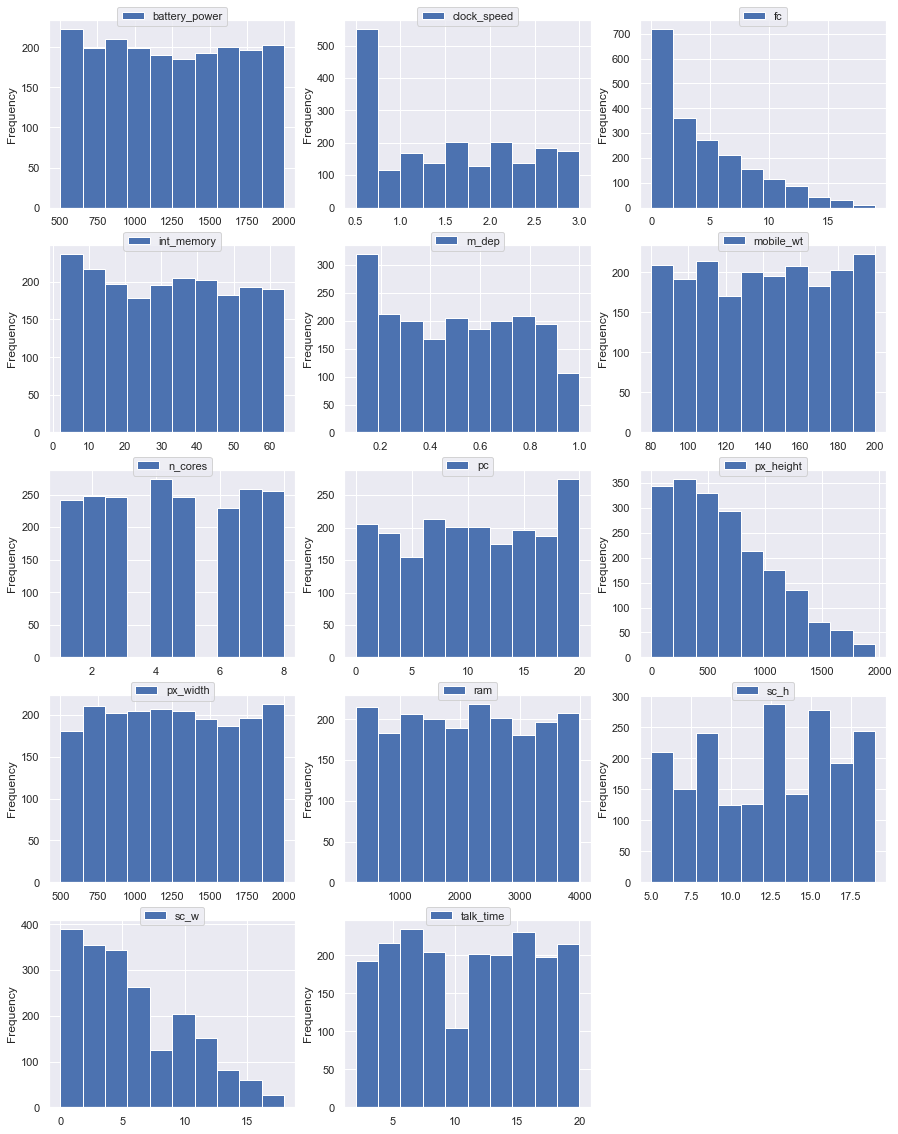

In [10]:
#numerical attributes
fig = plt.figure(figsize=(15,20))
for i,col in enumerate(numerical):
    ax=plt.subplot(5,3,i+1) 
    train[col].plot.hist(ax = ax).tick_params(axis = 'x',labelrotation = 360)
    ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.1))
plt.show()

- Numerical attributes having skewed distributions: clock_speed,fc,m_dep, px_height, sc_w. We will apply median as a measure of central tendency.
- Other numerical attributes having symmetrical distributions, we will apply mean as a measure of central tendency.

In [11]:
skewed = ['clock_speed','fc','m_dep', 'px_height', 'sc_w']
no_skewed = ['battery_power','int_memory','mobile_wt','n_cores','pc','px_width','ram','sc_h','talk_time']

#### 2.1. What attribute has the most effect on phone price? 

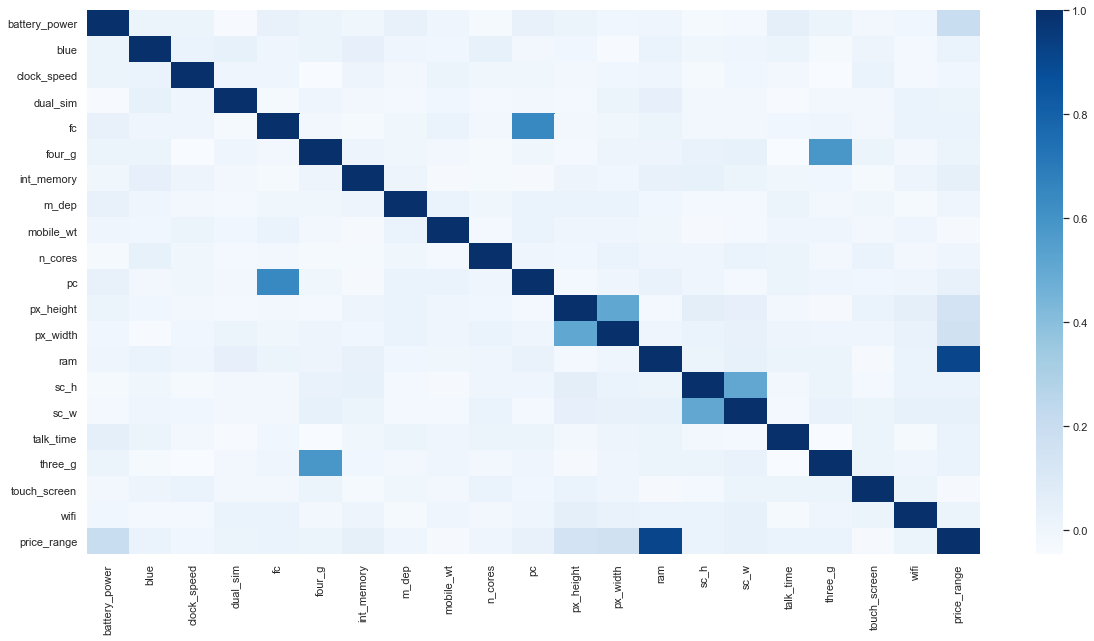

In [12]:
#correlation between attributes
corr = train.corr()
fig, (ax) = plt.subplots(1,1,sharey = True, figsize = (20,10))
sns.heatmap(corr, cmap = 'Blues')

We can see these attributes having relationship with each other:
- Price range vs. ram: high positive correlation
- fc vs. pc: positive correlation
- four_g vs. three_g: positive correlation
- pc_height vs. pc_width: positive correlation

In [13]:
#correlation between price and phone attributes
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Here we can see that Ram has high positive correlation with Price Range. The larger the Ram the higher the price. Other attributes do not affect phone price as much as ram. 

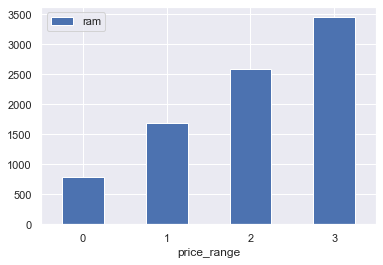

In [14]:
train.groupby('price_range').mean()['ram'].plot(kind = 'bar', legend = True).tick_params(axis = 'x', labelrotation = 360)

#### 2.2. Attributes of high-priced vs. low-priced phones 

#### 2.2.1 Numerical Variables 

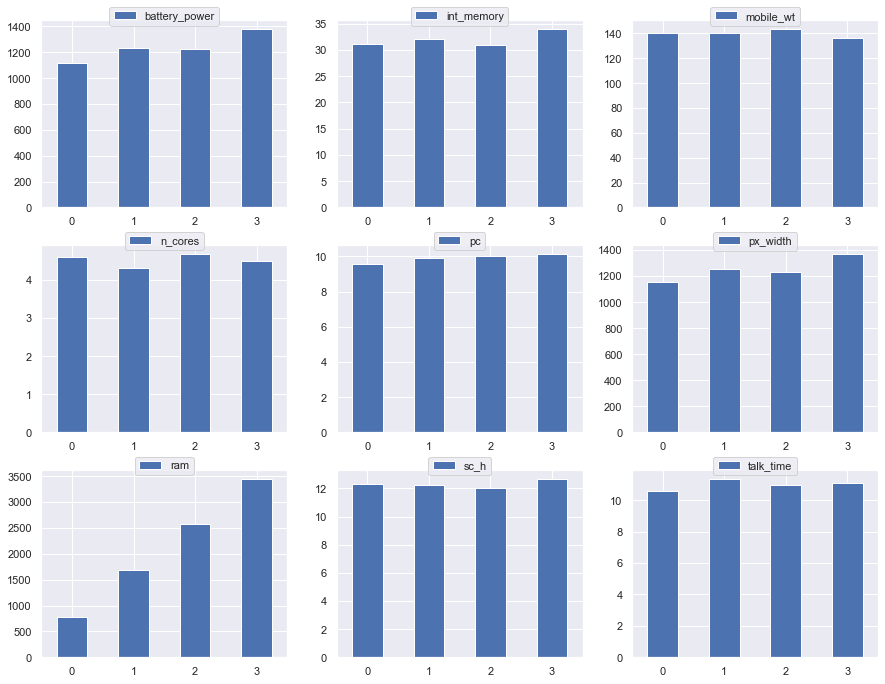

In [15]:
#variables with symmetrical distributions
group_no_skewed = train.groupby('price_range')[no_skewed].mean().reset_index()
fig = plt.figure(figsize=(15,20))
for i,col in enumerate(group_no_skewed.iloc[:,1:].columns):
    ax=plt.subplot(5,3,i+1) 
    group_no_skewed.iloc[:,1:][col].plot.bar(ax = ax).tick_params(axis = 'x',labelrotation = 360)
    ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.1))
plt.show()

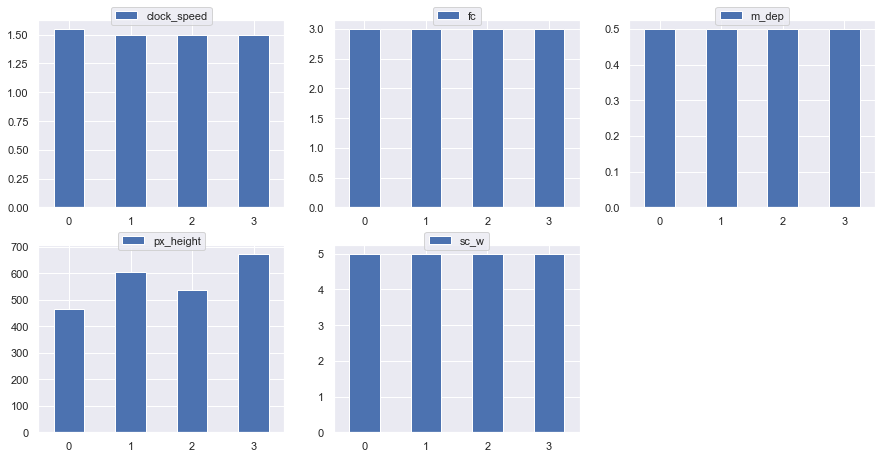

In [16]:
#variables with skewed distributions
group_skewed = train.groupby('price_range')[skewed].median().reset_index()
fig = plt.figure(figsize=(15,20))
for i,col in enumerate(group_skewed.iloc[:,1:].columns):
    ax=plt.subplot(5,3,i+1) 
    group_skewed.iloc[:,1:][col].plot.bar(ax = ax).tick_params(axis = 'x',labelrotation = 360)
    ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.1))
plt.show()

High-priced phones seem to have:
    - Better battery: higher 'battery_power' and higher 'talk_time' 
    - Better camera: 
        - higher 'pc': primary camera mega pixels
        - higher 'px_height': Pixel Resolution Height
        - higher 'px_width': Pixel Resolution Width
    - Better memory:
        - higher 'int_memory': internal memory
        - higher 'ram': Random Access Memory

#### 2.2.2. Categorical Variables 

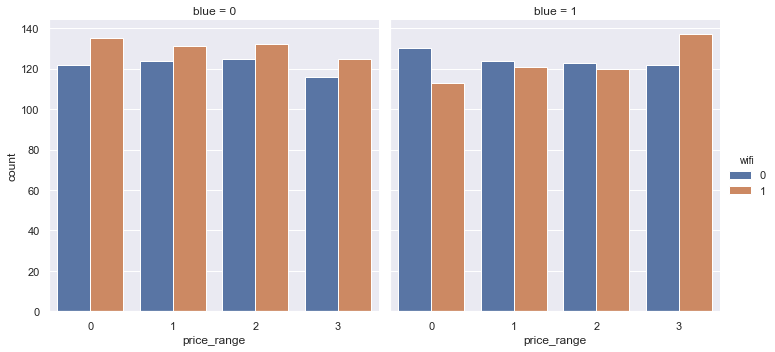

In [17]:
#bluetooth, wifi vs. price
sns.catplot('price_range', col='blue',hue = 'wifi',data = train,  kind = 'count', col_wrap=2)

Findings:
- Bluetooth and Wifi seem to not have a significant affect to phone price since they have similar distribution in every price range.

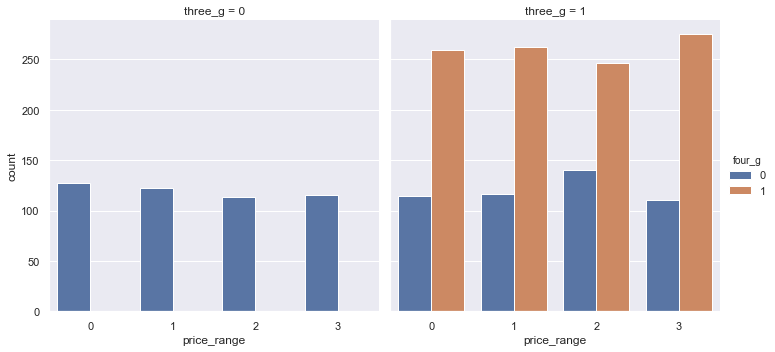

In [18]:
#3g, 4g vs. price
sns.catplot('price_range', col='three_g',hue = 'four_g',data = train,  kind = 'count', col_wrap=2)

Findings:
- Nearly half of the phones have both 3g and 4g.
- Phones must have 3g in order to have 4g.
- These attributes seem to not affect the price very much as they have similar distributions in every price range.

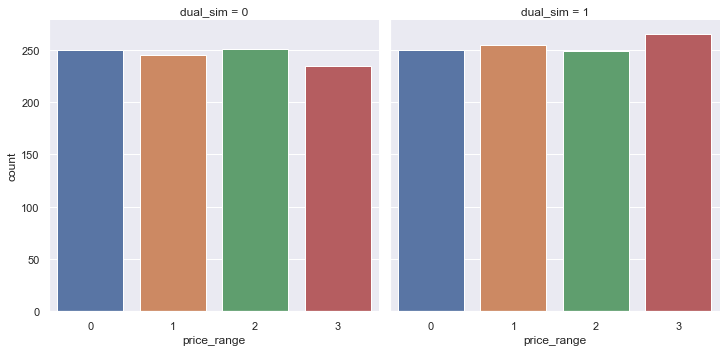

In [19]:
#dual_sim vs. price
sns.catplot('price_range', col='dual_sim',data = train,  kind = 'count')

Findings:
- Whether the phone has dual_sim or not seem to not have a significant affect to phone price since they have similar distribution in every price range.

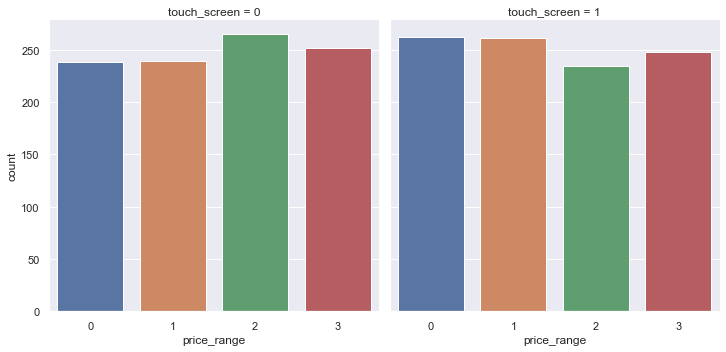

In [20]:
#touch_screen vs. price
sns.catplot('price_range', col='touch_screen',data = train,  kind = 'count')

Findings:
- Whether the phone has touch screen or not seem to not have a significant affect to phone price since they have similar distribution in every price range.

## 3. Build model to predict price range

#### 3.1. Preprocessing data

In [21]:
#scale numeric variables of training data
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
train_num_scaled = scaler_train.fit_transform(train[numerical])
scaler_train.data_max_
scaler_train.data_min_

array([5.01e+02, 5.00e-01, 0.00e+00, 2.00e+00, 1.00e-01, 8.00e+01,
       1.00e+00, 0.00e+00, 0.00e+00, 5.00e+02, 2.56e+02, 5.00e+00,
       0.00e+00, 2.00e+00])

In [22]:
train_num_scaled = pd.DataFrame(train_num_scaled,columns=train[numerical].columns)
train_num_scaled

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444
1996,0.977956,0.84,0.000000,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778
1997,0.941884,0.16,0.052632,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667
1998,0.675351,0.16,0.210526,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444


In [23]:
#scale numeric variables of test data
from sklearn.preprocessing import MinMaxScaler
scaler_test = MinMaxScaler()
test_num_scaled = scaler_test.fit_transform(test[numerical])
scaler_test.data_max_
scaler_test.data_min_

array([5.00e+02, 5.00e-01, 0.00e+00, 2.00e+00, 1.00e-01, 8.00e+01,
       1.00e+00, 0.00e+00, 0.00e+00, 5.01e+02, 2.63e+02, 5.00e+00,
       0.00e+00, 2.00e+00])

In [24]:
test_num_scaled = pd.DataFrame(test_num_scaled,columns=test[numerical].columns)

In [25]:
test_final = pd.concat([test[categorical],test_num_scaled], axis = 1)
test_final.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1,1,0,0,1,0,0.362241,0.52,0.736842,0.048387,0.000000,0.941667,0.285714,0.8,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000
1,1,1,1,1,0,0,0.227485,0.00,0.210526,0.951613,0.777778,0.925000,0.571429,0.6,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778
2,1,0,0,0,1,1,0.871915,0.92,0.052632,0.403226,0.888889,0.883333,0.285714,0.2,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444
3,0,1,1,1,1,0,0.697799,0.00,0.947368,0.370968,0.444444,0.133333,1.000000,1.0,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778
4,0,0,1,1,0,1,0.623082,0.36,0.578947,0.758065,0.444444,0.233333,0.714286,0.9,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778


#### 3.2. Split data into train, validation & test set

In [26]:
#X & Y array
import tensorflow as tf
X = pd.concat([train[categorical],train_num_scaled], axis = 1)
y = tf.keras.utils.to_categorical(train['price_range'], 4)

In [27]:
X.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,0,0,0,0,1,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,1,1,1,1,1,0,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,1,1,1,1,1,0,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,1,0,0,1,0,0,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,1,0,1,1,1,0,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222


In [28]:
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [29]:
#Split the original train data into train and val data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, train['price_range'], test_size=0.33, random_state=101)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1340, 20)
(1340,)
(660, 20)
(660,)


#### 3.3. Build deep learing model to predict price range

In [31]:
#import deep learning libraries
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [32]:
#build model
model_1 = Sequential()
model_1.add(Dense(25, input_dim=20, activation='relu'))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(4, activation='softmax'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 104       
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=25, 
                   validation_data=(X_val,y_val))

Train on 1340 samples, validate on 660 samples
Epoch 1/20
1340/1340 [==============================] - 0s 198us/step - loss: 1.3629 - accuracy: 0.3433 - val_loss: 1.3384 - val_accuracy: 0.4000
Epoch 2/20
1340/1340 [==============================] - 0s 68us/step - loss: 1.2775 - accuracy: 0.4403 - val_loss: 1.2454 - val_accuracy: 0.4818
Epoch 3/20
1340/1340 [==============================] - 0s 67us/step - loss: 1.1500 - accuracy: 0.5425 - val_loss: 1.0978 - val_accuracy: 0.5545
Epoch 4/20
1340/1340 [==============================] - 0s 75us/step - loss: 0.9918 - accuracy: 0.6216 - val_loss: 0.9641 - val_accuracy: 0.5985
Epoch 5/20
1340/1340 [==============================] - 0s 75us/step - loss: 0.8550 - accuracy: 0.6791 - val_loss: 0.8437 - val_accuracy: 0.6424
Epoch 6/20
1340/1340 [==============================] - 0s 80us/step - loss: 0.7554 - accuracy: 0.7291 - val_loss: 0.7432 - val_accuracy: 0.7091
Epoch 7/20
1340/1340 [==============================] - 0s 80us/step - loss: 0.675

#### 3.4. Model Evaluation 

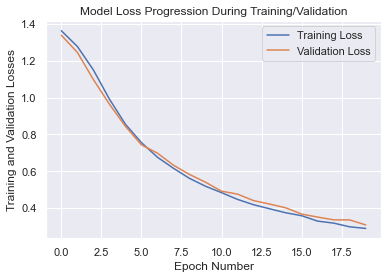

In [34]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [35]:
score = model_1.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30815036730332807
Test accuracy: 0.903030276298523


In [36]:
#test data prediction
prediction_test = np.argmax(model_1.predict(test_final), axis=1)
pd.DataFrame({'id' : test['id'],'price_range' : prediction_test})

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2
